<a href="https://colab.research.google.com/github/compartia/nlp_tools/blob/tensorflow-model/augmentation_NER_Matcher_(TF).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
GLOBALS__={}

## MAIN, init, load code

In [2]:
#@title  { form-width: "300px", display-mode: "form" }
import os






# ''' AZ:-IMPORT CODE GITHUB----------------------------------------------😺------ '''
import sys
# ====================================
# ====================================
_git_branch = "tensorflow-model"  # @param {type:"string"}
# ====================================
# ====================================


def _init_import_code_from_gh():
  if 'GLOBALS__' not in globals():
    print('adding global GLOBALS__')
    global GLOBALS__
    GLOBALS__ = {}

  if '_init_import_code_from_gh' in GLOBALS__:
    print('👌 code already imported from GitHub!')
    return

  import subprocess
  def exec(x):
    r = subprocess.check_output(x, shell=True)
    r = r.decode('unicode-escape').encode('latin1').decode('utf8')
    print(r)

  print(f"fetching code from GitHub.....{_git_branch}")
  try:
    exec('rm -r nlp_tools')
  except:
    pass
  exec(f'git clone --single-branch --branch {_git_branch} https://github.com/compartia/nlp_tools.git nlp_tools')

  print('🦊 GIT revision:')
  exec('cd nlp_tools\ngit rev-list --reverse HEAD | awk "{ print NR }" | tail -n 1\ngit branch\ngit log -3 --pretty=%B')

  sys.path.insert(0, 'nlp_tools')

  # self-test
  from text_tools import untokenize
  print(untokenize(['code', 'imported', 'OK 👍']))

  print('installing antiword...')
  exec('sudo apt-get install antiword')

  print('installing docx2txt...')
  exec("pip install docx2txt")

  GLOBALS__['_init_import_code_from_gh'] = True

  ''' AZ:-------------------------------------------------IMPORT CODE GITHUB-😺---'''
  print('❤️ DONE importing Code fro GitHub')


# AZ:-INIT ELMO-----------------------------------------------------------------------------------

import tensorflow_hub as hub

#
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML


 

# AZ:- THE CODE----------------------------------------------------------------------------------

def _init_the_code(reset=False):
  if '_init_the_code' in GLOBALS__ and not reset:
    print('👌 Code is alredy imported!')
    return

  from renderer import HtmlRenderer
  from renderer import to_multicolor_text
  from renderer import known_subjects_dict

  from structures import ContractSubject
  from contract_parser import ContractDocument3

  from ml_tools import ProbableValue

  from legal_docs import LegalDocument
  from renderer import as_warning, as_headline_3, as_offset, as_smaller

  class DemoRenderer(HtmlRenderer):

    def render_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      html = self.to_color_text(tokens, weights, colormap, print_debug, _range)
      display(HTML(html))

    def to_color_text(self, tokens, weights, colormap='coolwarm', print_debug=False, _range=None):
      return super()._to_color_text(tokens, weights, mpl, colormap=colormap, _range=_range)

    def render_multicolor_text(self, tokens, vectors, colormap, min_color=None, _slice=None):
      display(HTML(to_multicolor_text(tokens, vectors, colormap, min_color=min_color, _slice=_slice)))

     
     

     
  GLOBALS__['renderer'] = DemoRenderer()

  GLOBALS__['_init_the_code'] = True
  print("❤️ DONE initializing the code")

  # AZ:-------------------------------------------------Init Protocols context===


def read_doc(fn):
  import docx2txt, sys, os

  text = ''
  try:
    text = docx2txt.process(fn)

  except:
    print("Unexpected error:", sys.exc_info())
    os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
    with open(fn + '.txt') as f:
      text = f.read()

  return text

def interactive_upload(filetype):
  from google.colab import files
  import docx2txt

  print(f'Please select "{filetype}" .docx file:')
  uploaded = files.upload()
  docs = []
  for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

    with open(fn, "wb") as df:
      df.write(uploaded[fn])
      df.close()

    # extract text

    text = ''
    try:
      text = docx2txt.process(fn)
    except:
      print("Unexpected error:", sys.exc_info())
      os.system('antiword -w 0 "' + fn + '" > "' + fn + '.txt"')
      with open(fn + '.txt') as f:
        text = f.read()
    print("Символов в оригинальном документе:", len(text))
    docs.append(text)
    return docs

  
# AZ:- ENDO OF THE THE CODE------------------------------------------------XXXX


# 1.
_init_import_code_from_gh()
 
# 3.
_init_the_code(True)



W0518 16:25:49.312112 139921162422144 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


fetching code from GitHub.....tensorflow-model


🦊 GIT revision:
432
* tensorflow-model
Created using Colaboratory
more experiments
compare 4 models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
code imported OK 👍
installing antiword...
Reading package lists...
Building dependency tree...
Reading state information...
antiword is already the newest version (0.37-11build1).
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.

installing docx2txt...

❤️ DONE importing Code fro GitHub
❤️ DONE initializing the code


# Prepare train set

## Разметка договоров ( regEx)
 - чтение докуметов
 - поиск по шаблонам (org name, org type, org alias, etc)
 - формирование one-hot векторов (матрицы), она будет использована в TF(keras?) модели как labels

### load files from gdrive

In [3]:

from google.colab import auth
from google.colab import drive
 

drive.mount('/content/gdrive', force_remount=True)


import glob
def read_documents(filename_prefix):
  texts = {}
  for file in glob.glob(filename_prefix+"*.doc"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.doc FILE!!', file)

  for file in glob.glob(filename_prefix+"*.docx"):
    try:
      text = read_doc(file)
      texts[file] = text
      print("good:", file)
    except:
      print('WRONG *.docx FILE!!', file)
      
  return texts

contracts_filename_prefix='/content/gdrive/My Drive/GazpromOil/Contracts/'
contracts = read_documents(contracts_filename_prefix)


assert len(contracts) > 0


Mounted at /content/gdrive
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f417e9a8b88>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Чудеса.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f417e9a8d88>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Доп.согл3 Доверие.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f417e9a8b48>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора ООО Зеленые.doc
Unexpected error: (<class 'KeyError'>, KeyError("There is no item named 'word/document.xml' in the archive",), <traceback object at 0x7f417e9a8ac8>)
good: /content/gdrive/My Drive/GazpromOil/Contracts/Договор купли-продажи_ООО Парацельс.doc
Unexpected error: (<class 'KeyError'>, KeyEr

### Rendering utils

In [0]:
def color_matrix(matrix, tokens):
    
  mt = matrix.T

  colormap = {
      
    'undefined': (1, 0, 0.4),
        
    '0.type': (0, 1, 0.6),
    '1.type': (0, 1, 0.5),
      
    '0.name': (1, 0.7, 0),
    '1.name': (1, 0.5, 0),

    '0.alias': (0.3, 1, 0),
    '1.alias': (0.2, 1, 0),

    '0.alt_name': (0.6, 0.2, 0),
    '1.alt_name': (0.6, 0.2, 0),
  }
  
  
  vectors = {}
  vectors['undefined'] = mt[0]
  for k in range(1, int(matrix.shape[1])):
    key = f'{int(k/len(entities_types))}.{entities_types[k%len(entities_types)]}'
    vectors[key] = mt[k]
  
 
  GLOBALS__['renderer'].render_multicolor_text(tokens, vectors, colormap, min_color=(0.4, 0.4, 0.4) )
  
  
  
  
  
##------------
def plot_matrix(matrix):
    
  mt = matrix.T
  
  with sns.axes_style("white"):
    plt.figure(figsize=(25, 3))
    ax = sns.heatmap(mt, square=False,  cmap="YlGnBu")
    plt.show()


### Parsing, etc

In [5]:
from contract_agents import find_org_names, normalize_contract, entities_types
from text_tools import tokenize_text, tokens_in_range
import numpy as np


def preprocess_contract(txt):
  trimmed = txt[0:1500]
  normalized_contract = normalize_contract(trimmed)
  return normalized_contract


def convert_char_slices_to_tokens(txt,  org_infos):
  tokens = tokenize_text(txt)
  for org in org_infos:
    for ent in org:
      span = org[ent][1]

      if span[0] > 0:
        tokens_slice = tokens_in_range(span, tokens, txt)
        org[ent]  = (org[ent][0], org[ent][1], tokens_slice)
      else:
        org[ent]  = (org[ent][0], None, None)
  return org_infos, tokens
        
        
def make_categories_vector(agents_infos, vector_len):

  vector = np.zeros( vector_len )

  e=1
  for agent_n in range(2):
    org = agents_infos[agent_n]
    for entity_type in org:
      text_slice = org[entity_type][2]

      if text_slice is not None:
        vector[text_slice] = e

      e += 1

  return vector
        
  

  
### TESTS 🔞============✂️============⚙️========================================
import matplotlib.pyplot as plt
import seaborn as sns

normalized_contract = preprocess_contract( list(contracts.values())[7] )
org_infos = find_org_names(normalized_contract)
org_infos, contract_tokens = convert_char_slices_to_tokens(normalized_contract,  org_infos)
print(org_infos)


categories_vector = make_categories_vector(org_infos, len(contract_tokens))

# plot_matrix(categories_vector)
GLOBALS__['renderer'].render_color_text(contract_tokens, categories_vector   )

[{'type': ('Акционерное общество', (110, 130), slice(17, 19, None)), 'type_ext': (' ', (130, 131), slice(19, 19, None)), 'name': ('ГПН-ГПН', (132, 139), slice(20, 21, None)), 'alt_name': ('', (140, 140), slice(22, 22, None)), 'alias': ('Жертвователь', (166, 178), slice(27, 28, None))}, {'type': ('Некоммерческая организация', (292, 318), slice(49, 51, None)), 'type_ext': (' ФОНД СОДЕЙСТВИЯ ВСЕМ ', (318, 340), slice(51, 54, None)), 'name': ('РОМАШКА', (341, 348), slice(55, 56, None)), 'alt_name': ('', (349, 349), slice(57, 57, None)), 'alias': ('Одаряемый', (375, 384), slice(62, 63, None))}]


In [6]:
def categories_vector_to_onehot_matrix(vector, height=10):
  
  m = np.zeros( (len(vector), 1+int(height)) )
  
  for i in range(len(vector)):
    val = vector[i]
#     if val != 0:
    m[i][int(val)] = 1.0
    
  
  return m
  
  
  
### TESTS 🔞============✂️============⚙️========================================
m = categories_vector_to_onehot_matrix(categories_vector)
print(m.shape, m[0])

color_matrix(m, contract_tokens)


(246, 11) [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [0]:
 


def validate_find_patterns_in_contract_results(d):
  assert len(d) == 2
#   TODO:

# def find_patterns_in_contract(normalized_contract: str):
#   tokens = tokenize_text(normalized_contract)

#   agents_infos = find_org_names(normalized_contract)
#   convert_char_slices_to_tokens(normalized_contract,  agents_infos)
  
#   validate_find_patterns_in_contract_results(agents_infos)

#   cols = len(tokens)
#   return make_matrix(  agents_infos,  cols )
 

# del make_matrix
# def make_matrix(agents_infos, matrix_len):
  
#   matrix = np.zeros(  ( 2 * len(entities_types), matrix_len))

#   e=0
#   for agent_n in range(2):
#     org = agents_infos[agent_n]
#     for entity_type in entities_types:
#       text_slice = org[entity_type][2]

#       if text_slice is not None:
#         matrix[e][text_slice] = 1.0

#       e += 1

#   return matrix.T

 
 
 
  
  
### TESTS 🔞============✂️============⚙️========================================

import matplotlib.pyplot as plt
import seaborn as sns



  
t = preprocess_contract( list(contracts.values())[1] )
tokens = tokenize_text(t)
# matrix = find_patterns_in_contract(t)


# print(matrix[0])

# color_matrix(matrix, tokens)
# plot_matrix(matrix)

### Augmentaion metoden

In [8]:
import random
import re
import numpy as np
from text_tools import untokenize

from typing import AnyStr, Match, Dict, List

def make_random_name(lenn) -> str:
  return ''.join(random.choices('АБВГДЕЖЗИКЛМН', k=1) + random.choices('абвгдежопа ', k=lenn))


def obfuscate_contract(txt: str, org_infos: List[Dict]):
  txt_a = txt
  for org in org_infos:
    for e in ['name', 'alias', 'alt_name']:
      
      substr = org[e][0]
      
      if substr and substr!='':
        
        try:
          r = re.compile(substr)
          txt_a = re.sub(r, make_random_name(10), txt_a)
        except:
          print('failed replacing ',e, substr)

  return txt_a, find_org_names(txt_a)



def augment_dropout_words(tokens, categories_vector, rate):
  assert len( tokens) == len(categories_vector) 
   
  new_tokens=[]
  new_categories_vector=[]
  
  for i in range(len(tokens)):
    r=random.random()
    
    if r > rate:
      new_tokens.append( tokens[i] )
      new_categories_vector.append( categories_vector[i] )
  
  
  return new_tokens, np.array(new_categories_vector)


def augment_alter_case(tokens, rate):   
  new_tokens=[]
  
  for i in range(len(tokens)):
    t = tokens[i]         
    if random.random() < rate:
      if random.random() < 0.5:
        t=t.upper()
      else:
        t=t.lower()    
    new_tokens.append( t )
   
  return new_tokens 


def augment_trim(tokens, categories_vector, max_to_trim=40):   
  _slice=slice( random.randint(0, max_to_trim), -random.randint(0, max_to_trim))
     
  return tokens[_slice] , categories_vector[_slice]

def augment_remove_punctuation(tokens, categories_vector, rate):   
  new_tokens=[]
  new_categories_vector=[]
  
  for i in range(len(tokens)):
    t = tokens[i]         
    if t in ',."«-»–()' and random.random() < rate:
      pass
    else:      
      new_tokens.append( t )
      new_categories_vector.append( categories_vector[i] )
   
  return new_tokens, new_categories_vector


def augment_contract(tokens_, categories_vector_ ):
  new_tokens, new_categories_vector = augment_dropout_words(tokens_, categories_vector_, 0.1)
  new_tokens, new_categories_vector = augment_remove_punctuation(new_tokens, new_categories_vector, 0.15)
  new_tokens = augment_alter_case(new_tokens, 0.15)
  new_tokens, new_categories_vector = augment_trim(new_tokens, new_categories_vector, 30)
 
  
  return new_tokens, new_categories_vector



### TESTS 🔞============✂️============⚙️========================================
normalized_contract = preprocess_contract( list(contracts.values())[2] )


org_infos = find_org_names(normalized_contract)
obfuscated_contract, org_infos = obfuscate_contract(normalized_contract, org_infos )
del normalized_contract
org_infos, contract_tokens = convert_char_slices_to_tokens(obfuscated_contract,  org_infos)
categories_vector = make_categories_vector(org_infos, len(contract_tokens)).T



print(untokenize(contract_tokens))
print("="*150)
# new_tokens, new_categories_vector = dropout_words(contract_tokens, categories_vector, 0.5)

new_tokens, new_categories_vector = augment_contract(contract_tokens, categories_vector)
 
 
m = categories_vector_to_onehot_matrix(new_categories_vector)
color_matrix(m, new_tokens)

Договор № КБ 0197531 
 |г. Санкт-Петербург| « 25 » августа 2018 год| 
||| 
 
 Общество с ограниченной ответственностью « Баежбвоежвд » ( ООО « Баежбвоежвд » ), именуемое в дальнейшем « Евапвоггвба », в лице Генерального директора Иванова Ивана Васильевича, действующего на основании Устава, с одной стороны, и Общество с ограниченной ответственностью « Л ввебабевг » ( ООО « Л ввебабевг » ), именуемое в дальнейшем « Гжаоапжвабв », в лице Генерального директора Гринпис Маргариты Олеговны, действующего на основании Устава, с другой стороны, совместно именуемые « Стороны », а по отдельности « Сторона », заключили настоящий договор возмездного оказания услуг ( далее по тексту – « Договор » ) о нижеследующем: 
 1. Предмет договора 
 1. В соответствии с условиями Договора Гжаоапжвабв обязуется по заданию Евапвоггвбаа оказать услуги по организации и проведению выездных мероприятий ( далее по тексту – « Услуги » ), а Евапвоггвба обязуется оплатить Услуги. 
 2. Услугой по организации и проведению 

## Building trainset

In [29]:
def _extend_trainset_with_obfuscated_contracts(parsed, n):
  
 
  _parsed = []
  
  for txt, org_infos in parsed:  
    
    _parsed.append( (txt, org_infos) )
    
    for i in range(n):
      txt_o, org_infos_o = obfuscate_contract(txt, org_infos)
      _parsed.append( (txt_o, org_infos_o) )

  return _parsed
  
  
  
  
def to_categories_vector(txt, org_infos):
  org_infos, contract_tokens = convert_char_slices_to_tokens(txt, org_infos)
  categories_vector = make_categories_vector(org_infos, len(contract_tokens))
  return categories_vector, contract_tokens



OBFUSCATED=5
AUGMENTED=6

def prepare_test_data(contracts):
  data = list(contracts.keys())

  # 1. parse available docs with regex
  parsed = []
  for fn in data:
    con = contracts[fn]
    normalized_contract = preprocess_contract(con)

    try:
      agents_infos = find_org_names(normalized_contract)
      validate_find_patterns_in_contract_results(agents_infos)

      parsed.append((normalized_contract, agents_infos))

    except:
      print(f'failed parsing: {fn}')

  print(f'Extending trainset with obfuscated contracts;  docs: {len(parsed)}')  
  parsed = _extend_trainset_with_obfuscated_contracts(parsed, OBFUSCATED)
  

  TOKENS = []
  LABELS = []
  LENS = []

  vectors = []

  print(f'Augmenting trainset; docs: {len(parsed)}')
  for txt, org_infos in parsed:

    categories_vector, contract_tokens = to_categories_vector(txt, org_infos)
    vectors.append(categories_vector)
    TOKENS.append(contract_tokens)

    for i in range(AUGMENTED):
      new_tokens, new_categories_vector = augment_contract(contract_tokens, categories_vector)
      vectors.append(new_categories_vector)
      TOKENS.append(new_tokens)

  _longest = 0
  for t in TOKENS:
    if len(t) > _longest:
      _longest = len(t)

  for i in range(len(TOKENS)):
    LENS.append(len(TOKENS[i]))
    padding = (_longest - len(TOKENS[i]))
    TOKENS[i] = TOKENS[i] + ['PAD'] * padding

    v_padded = np.concatenate([vectors[i], [0] * padding])

    m = categories_vector_to_onehot_matrix(v_padded)
    LABELS.append(m)

  return TOKENS, np.array(LABELS), LENS



_TEXTS, _LABELS, _LENS = prepare_test_data(contracts)
np_LABELS=_LABELS #alias
print('len (_TEXTS)=', len(_TEXTS))

 

failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/7. Соглашение БГ Газпромнефть-Региональные продажи.doc
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/Договор_ООО Зодчий_25 млн.$.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/ДКП Половинной НБ и АЗС.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора Пур адм.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/Договор 2.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/Договор выполнения работ_Петров.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/1.1. Договор пожертвования.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/Проект договора Пур адм - благотв.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/МНПЗ 2 Договор купли-продажи недвижимого имущества.docx
failed parsing: /content/gdrive/My Drive/GazpromOil/Contracts/ЕЮ2 Договор пожертвования (одаряемый).docx
failed pa

In [0]:
TEST_TOKENS = tokenize_text( preprocess_contract(contracts['/content/gdrive/My Drive/GazpromOil/Contracts/Проект договора Пур адм - благотв.docx']))
# print(_longest_len)

### Plot sample label  matrices

In [11]:

for m in random.choices( range(9,len(_LABELS)), k=10):
  color_matrix(_LABELS[m], _TEXTS[m])

# MODELS

## init

In [12]:
 

import os
import numpy as np

from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from gensim.models.keyedvectors import KeyedVectors

from keras.activations import relu
from keras.models import Sequential, Model
from keras.layers import Concatenate, Input, Flatten, Conv1D, MaxPooling1D, Lambda, Add, BatchNormalization
from keras.layers import Dropout, concatenate
from keras.utils.vis_utils import model_to_dot

from sklearn.metrics import classification_report

from IPython.display import SVG

Using TensorFlow backend.


In [0]:
EPOCHS = 2
BATCH_SIZE = 24

####  support  methods

In [0]:

import tensorflow as tf

module_url = 'https://storage.googleapis.com/az-nlp/elmo_ru-news_wmt11-16_1.5M_steps.tar.gz'


In [0]:
EMB_DIM = 1024

def get_embedings(inputs):
  r = elmo(
    inputs={
      "tokens": inputs[0],
      "sequence_len": tf.squeeze(inputs[1])
    },
    signature="tokens",
    as_dict=True)["elmo"]

  return r


# ------
def elmo_output_shape(input_shapes):
  shape1 = list(input_shapes[0])
  shape1+= [EMB_DIM]
  return tuple(shape1)




In [0]:
from keras import backend as K
from keras.objectives import categorical_crossentropy
from keras.optimizers import Adam
from keras.layers import LSTM, Flatten

 
def custom_loss(y_true, y_pred):
  return K.mean( K.square(y_pred - y_true) )
  
  
def get_conv_pool(x_input, sufix, feature_maps, n=3, activation='relu'):
  branch = Conv1D( filters = feature_maps, kernel_size=(n), padding='same', activation=activation, name='Conv_'+sufix+'_'+str(n))(x_input)
  return branch



def custom_categorical_crossentropy(x, y):
    x = K.flatten(x)
    y = K.flatten(y)
    return categorical_crossentropy(x, y)
  
  
def plot_training_history(history):
  # Plot training & validation accuracy values
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()
  
  
HISTORIES={}

def plot_compare_models():
  for key in HISTORIES:
    history=HISTORIES[key]
#     plt.plot(history.history['loss'], label=f'{key} loss')
    plt.plot(history.history['val_loss'], label=f'{key} val_loss')
  
  plt.title('Models loss')   
  plt.legend(loc='upper left')
  plt.show()
  
def validate_model(graph, model, model_name):
  with graph.as_default():  
    
    with tf.Session() as sess:

      K.set_session(sess) 

#       for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
  
#       graph.finalize()
  
      HISTORIES[model_name]=history
      plot_training_history(history)
      plot_compare_models()

      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      plot_matrix(pred[0])
      color_matrix(pred[0], TEST_TOKENS)
  del graph
  del model

## 0:  CNN-only Model

In [0]:
def build_cnn_only_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  embedding = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )

  conv_0 = get_conv_pool(embedding, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(embedding, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(embedding, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(embedding, 'c2', n=5, feature_maps=features*2, activation='sigmoid')

  
  _out = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 

  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')

  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='softmax')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Adadelta
  model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
  model.summary()
  
  return model

In [27]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_cnn_only_model( np_LABELS.shape[-1] )
  
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_blurry_10 (Conv1D)         (None, None, 2)      20482       DEEPPAVLOV[0][0]                 
__________

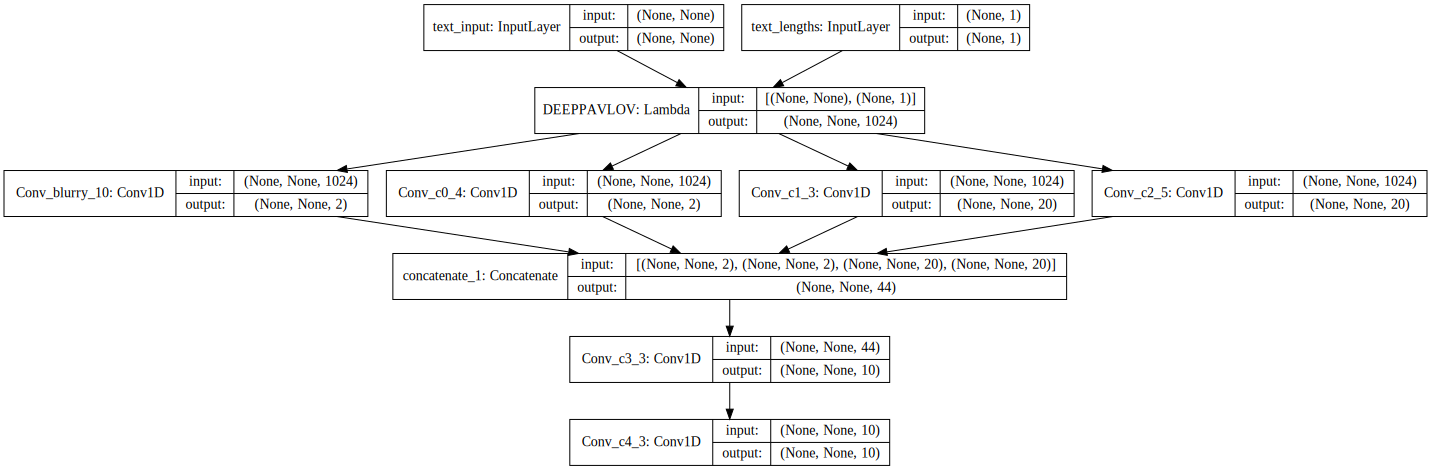

In [31]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 140 samples, validate on 47 samples
Epoch 1/20
140/140 [==============================] - 11s 77ms/step - loss: 2.2108 - acc: 0.1814 - val_loss: 1.8190 - val_acc: 0.7201
Epoch 2/20
140/140 [==============================] - 8s 60ms/step - loss: 1.6593 - acc: 0.8260 - val_loss: 1.4194 - val_acc: 0.9553
Epoch 3/20
140/140 [==============================] - 8s 60ms/step - loss: 1.2940 - acc: 0.9576 - val_loss: 1.1055 - val_acc: 0.9553
Epoch 4/20
140/140 [==============================] - 9s 61ms/step - loss: 1.0053 - acc: 0.9576 - val_loss: 0.8668 - val_acc: 0.9553
Epoch 5/20
140/140 [==============================] - 9s 63ms/step - loss: 0.7957 - acc: 0.9576 - val_loss: 0.7047 - val_acc: 0.9553
Epoch 6/20
140/140 [==============================] - 9s 62ms/step - loss: 0.6549 - acc: 0.9576 - val_loss: 0.5964 - val_acc: 0.9553
Epoch 7/20
140/140 [==============================] - 9s 61ms/step - loss: 0.5601 - acc: 0.9576 - val_loss: 0.5224 - val_acc: 0.9553
Epoch 8/20
140/140 [===

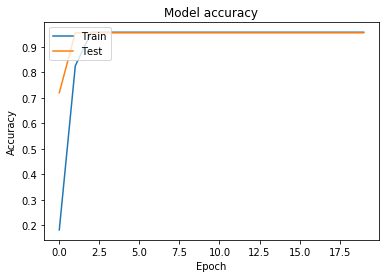

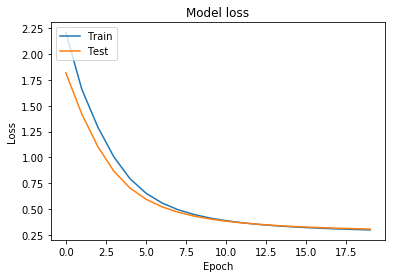

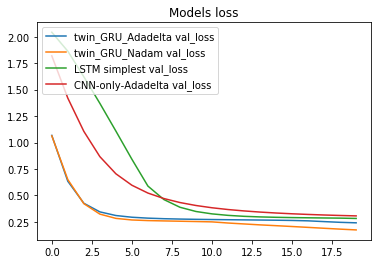

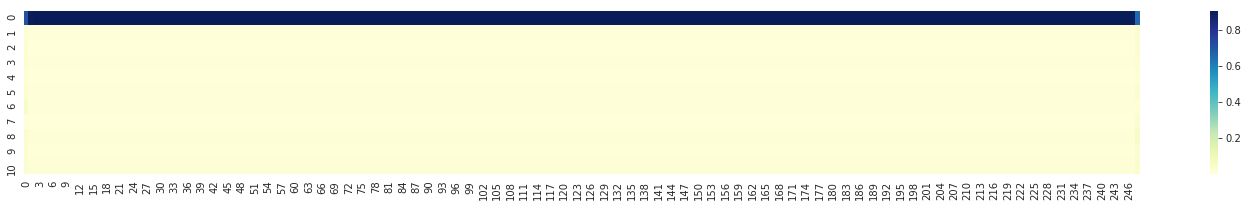

In [28]:
validate_model(graph, model, 'CNN-only-Adadelta')

Train on 140 samples, validate on 47 samples
Epoch 1/20
140/140 [==============================] - 11s 76ms/step - loss: 2.9115 - acc: 0.0045 - val_loss: 2.5963 - val_acc: 0.0044
Epoch 2/20
140/140 [==============================] - 8s 61ms/step - loss: 2.5025 - acc: 0.0045 - val_loss: 2.3585 - val_acc: 0.0044
Epoch 3/20
140/140 [==============================] - 9s 63ms/step - loss: 2.2861 - acc: 0.0046 - val_loss: 2.1706 - val_acc: 0.0045
Epoch 4/20
140/140 [==============================] - 9s 63ms/step - loss: 2.1054 - acc: 0.0046 - val_loss: 2.0065 - val_acc: 0.0047
Epoch 5/20
140/140 [==============================] - 9s 62ms/step - loss: 1.9473 - acc: 0.0102 - val_loss: 1.8591 - val_acc: 0.0110
Epoch 6/20
140/140 [==============================] - 9s 62ms/step - loss: 1.8017 - acc: 0.3081 - val_loss: 1.7173 - val_acc: 0.9517
Epoch 7/20
140/140 [==============================] - 9s 63ms/step - loss: 1.6604 - acc: 0.9542 - val_loss: 1.5785 - val_acc: 0.9551
Epoch 8/20
140/140 [===

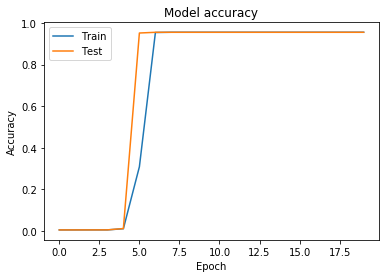

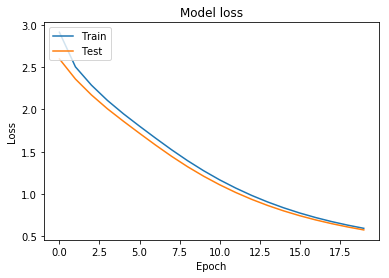

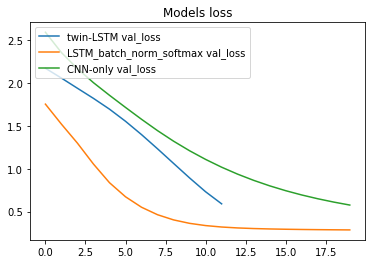

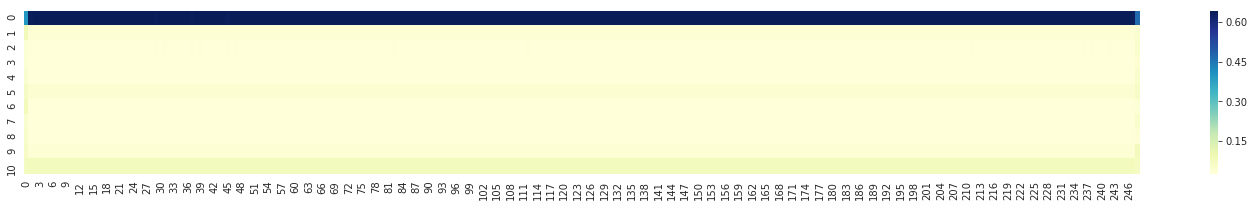

In [38]:
validate_model(graph, model, 'CNN-only')

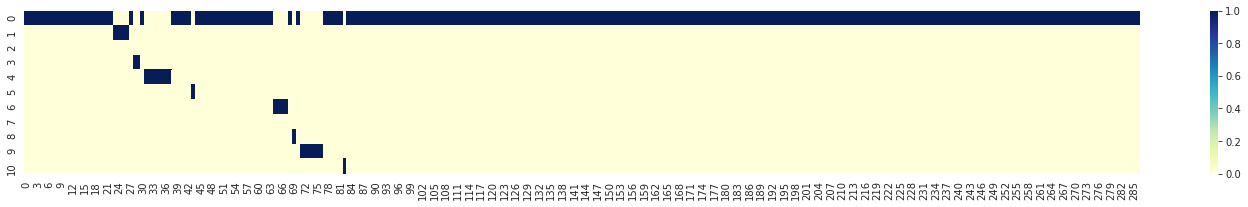

In [35]:

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)
      
      

      
plot_matrix(_LABELS[0])


## 1:  CNN + 1 LSTM Model

In [0]:
def build_big_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  embedding = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )

  conv_0 = get_conv_pool(embedding, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(embedding, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(embedding, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(embedding, 'c2', n=5, feature_maps=features*2, activation='sigmoid')
  

  
#   conv_1 = BatchNormalization()(conv_1)
#   conv_sum = Add()([conv_1, conv_2]) 
  
  conv_sum = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 
  
  
  
  conv_3 = get_conv_pool(conv_sum, 'c3', n=3, feature_maps=features, activation='sigmoid')
  
 
  lstm = LSTM(features, return_sequences=True)(conv_3)
 
  
  conv_4 = get_conv_pool(lstm, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=conv_4)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])
  model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  model.summary()
  
  return model

In [34]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_big_model( np_LABELS.shape[-1] )
  
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_blurry_10 (Conv1D)         (None, None, 2)      20482       DEEPPAVLOV[0][0]                 
__________

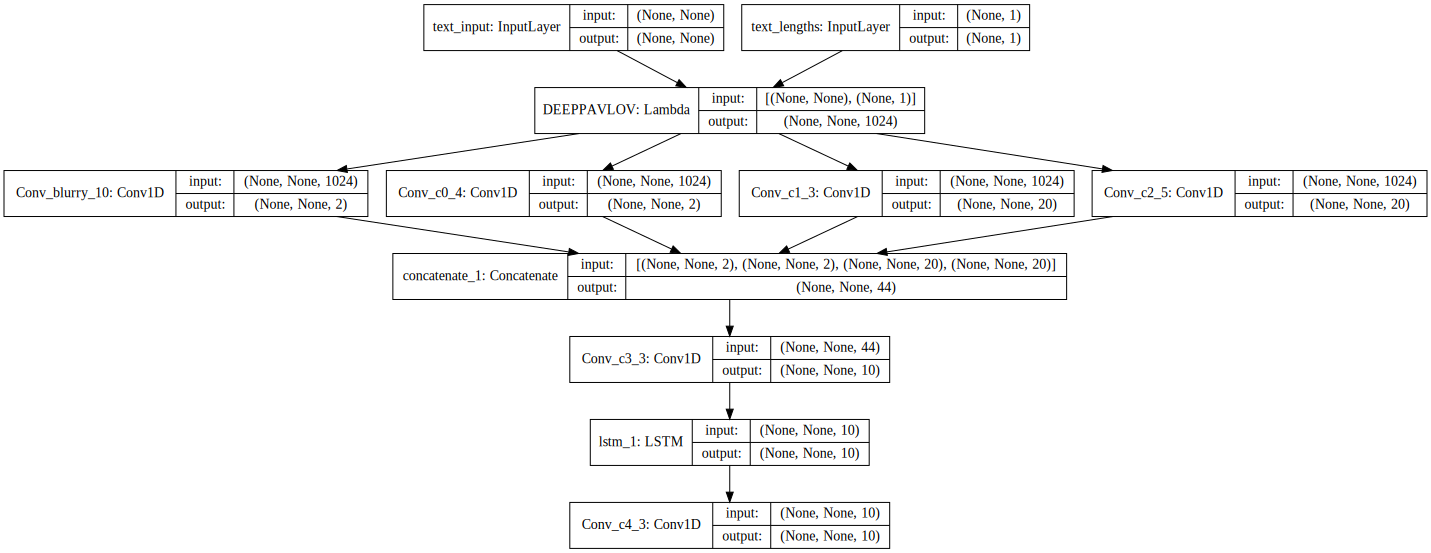

In [35]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 572 samples, validate on 191 samples
Epoch 1/3
572/572 [==============================] - 47s 82ms/step - loss: 0.0910 - acc: 0.0089 - val_loss: 0.0904 - val_acc: 0.0167
Epoch 2/3
572/572 [==============================] - 44s 76ms/step - loss: 0.0866 - acc: 0.0468 - val_loss: 0.0851 - val_acc: 0.0495
Epoch 3/3
572/572 [==============================] - 44s 77ms/step - loss: 0.0806 - acc: 0.1245 - val_loss: 0.0781 - val_acc: 0.2147


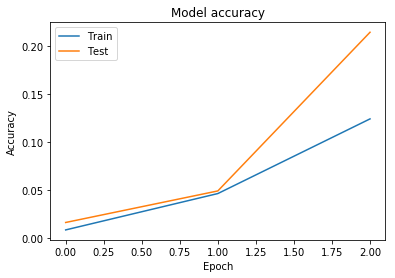

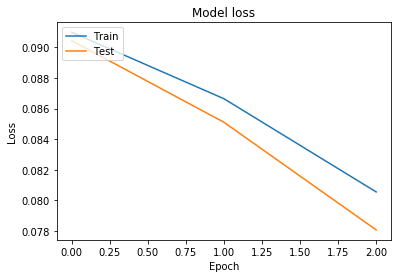

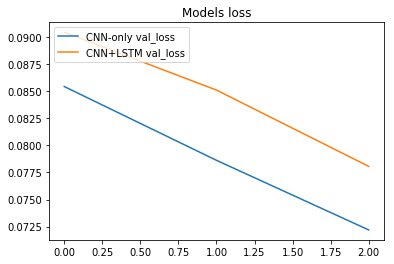

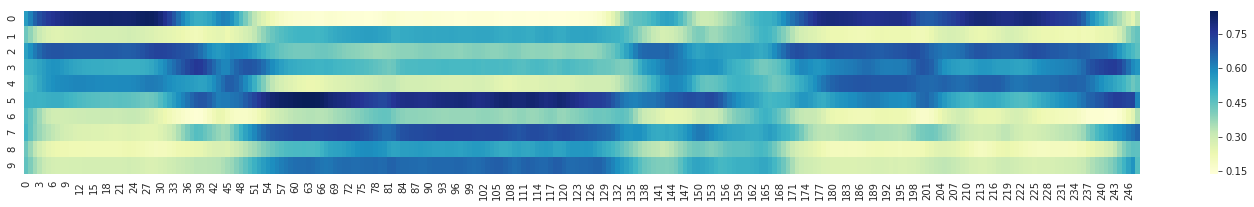

In [36]:

validate_model(graph, model, 'CNN+LSTM')

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])

      



## 2: LSTM Simplest Model

In [0]:
def build_lstm_simple_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 
  _out = LSTM(features, return_sequences=True)(_out)   
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
  model.summary()
  
  return model

In [24]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_simple_model( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 11)     33803       DEEPPAVLOV[0][0]                 
__________

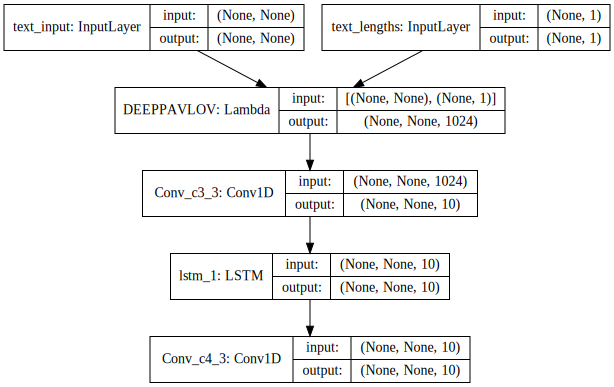

In [39]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 140 samples, validate on 47 samples
Epoch 1/20
140/140 [==============================] - 13s 96ms/step - loss: 2.1455 - acc: 0.9576 - val_loss: 2.0419 - val_acc: 0.9553
Epoch 2/20
140/140 [==============================] - 11s 78ms/step - loss: 1.9809 - acc: 0.9576 - val_loss: 1.8627 - val_acc: 0.9553
Epoch 3/20
140/140 [==============================] - 11s 78ms/step - loss: 1.7718 - acc: 0.9576 - val_loss: 1.6212 - val_acc: 0.9553
Epoch 4/20
140/140 [==============================] - 11s 79ms/step - loss: 1.5223 - acc: 0.9576 - val_loss: 1.3704 - val_acc: 0.9553
Epoch 5/20
140/140 [==============================] - 11s 79ms/step - loss: 1.2667 - acc: 0.9576 - val_loss: 1.1084 - val_acc: 0.9553
Epoch 6/20
140/140 [==============================] - 12s 83ms/step - loss: 0.9990 - acc: 0.9576 - val_loss: 0.8420 - val_acc: 0.9553
Epoch 7/20
140/140 [==============================] - 11s 79ms/step - loss: 0.7319 - acc: 0.9576 - val_loss: 0.5885 - val_acc: 0.9553
Epoch 8/20
140/14

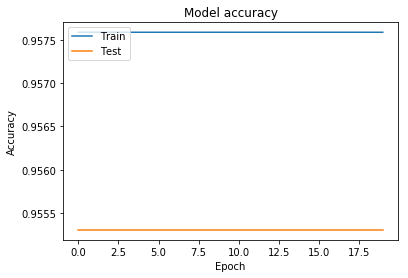

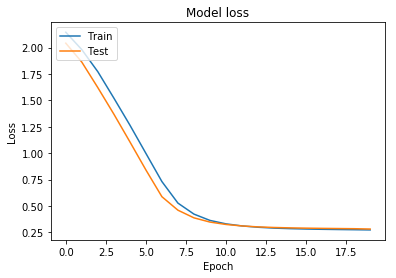

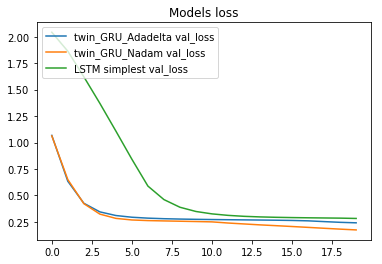

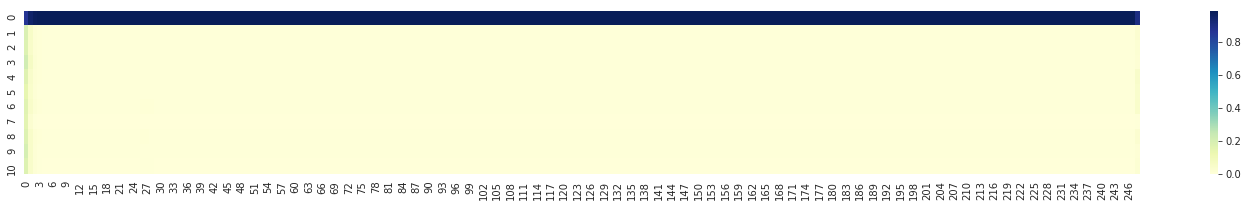

In [25]:
validate_model(graph, model, 'LSTM simplest')

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 2: Linear GRU  + hard_sigmoid: НЕ СХОДИЦЦА!! (но могла)

`hard_sigmoid` на последем слое -- это как бы округление (обрезание) до 1. Это сделано для того, чтобы результирующие вектора были больше похожи на one-hot (содержали круглые(целые) единицы) и соотв. `accuracy` была выше (см. имплементацию `accuracy` --  https://github.com/keras-team/keras/blob/9d33a024e3893ec2a4a15601261f44725c6715d1/keras/metrics.py#L30 )

In [0]:
 
from keras.layers import GRU

def build_lstm_simple_model_b(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='elu') 
  _out = GRU(features, return_sequences=True, activation=None)(_out)   

  #hard_sigmoid -- это как бы округление (обрезание) до 1
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='hard_sigmoid')
  
 
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [19]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_simple_model_b( np_LABELS.shape[-1] )


W0518 14:27:25.973072 140130381940608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

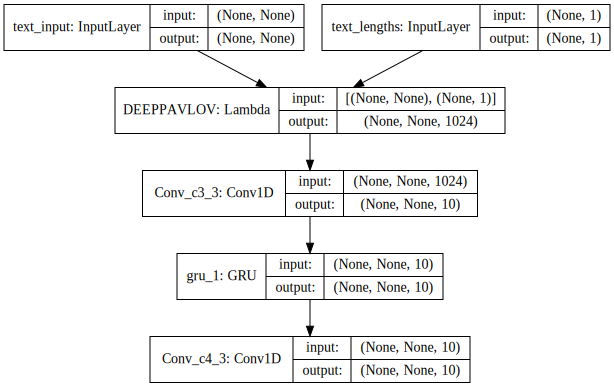

In [21]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0518 14:27:44.116885 140130381940608 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 572 samples, validate on 191 samples
Epoch 1/10
572/572 [==============================] - 48s 85ms/step - loss: 0.0662 - acc: 0.0751 - val_loss: 0.0521 - val_acc: 0.1039
Epoch 2/10
572/572 [==============================] - 41s 72ms/step - loss: 0.0434 - acc: 0.0834 - val_loss: 0.0441 - val_acc: 0.1205
Epoch 3/10
572/572 [==============================] - 42s 73ms/step - loss: 0.0366 - acc: 0.1363 - val_loss: 0.0375 - val_acc: 0.1325
Epoch 4/10
572/572 [==============================] - 41s 72ms/step - loss: 0.0224 - acc: 0.1449 - val_loss: 0.0277 - val_acc: 0.2215
Epoch 5/10
572/572 [==============================] - 42s 74ms/step - loss: 0.1126 - acc: 0.2351 - val_loss: 0.0844 - val_acc: 0.0981
Epoch 6/10
572/572 [==============================] - 41s 72ms/step - loss: 0.0371 - acc: 0.0587 - val_loss: 0.0333 - val_acc: 0.0586
Epoch 7/10
572/572 [==============================] - 42s 73ms/step - loss: 0.0191 - acc: 0.0696 - val_loss: 0.0219 - val_acc: 0.0812
Epoch 8/10
572/5

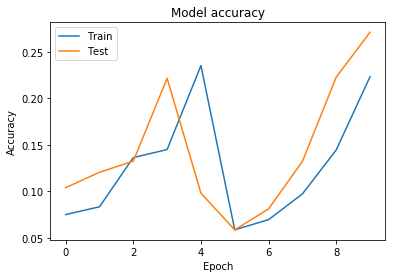

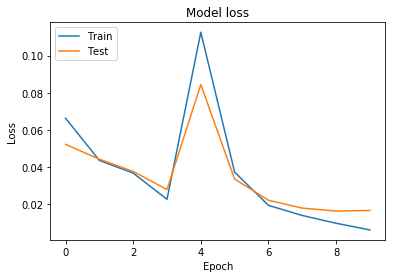

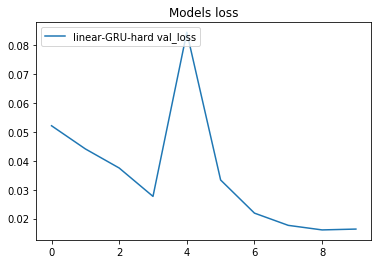

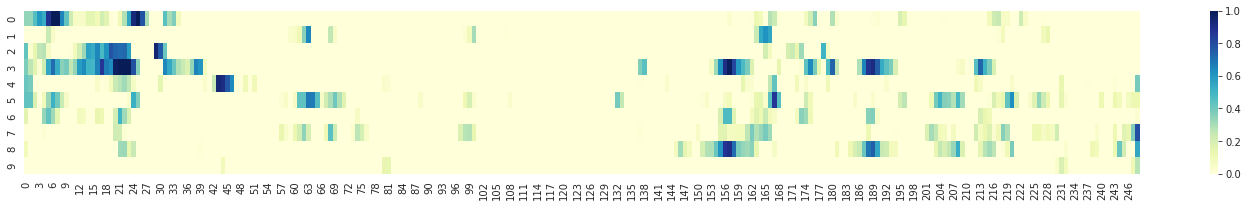

In [22]:
validate_model(graph, model, 'linear-GRU-hard')

## 2-b: Simplest tanh GRU  + hard_sigmoid 

`hard_sigmoid` на последем слое -- это как бы округление (обрезание) до 1. Это сделано для того, чтобы результирующие вектора были больше похожи на one-hot (содержали круглые единицв) и соотв. accuracy была выше (см. имплементацию `accuracy` --  https://github.com/keras-team/keras/blob/9d33a024e3893ec2a4a15601261f44725c6715d1/keras/metrics.py#L30 )

In [0]:
 
from keras.layers import GRU

def build_gru_simple_model_b(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='elu') 
  _out = GRU(features, return_sequences=True)(_out)   

  #hard_sigmoid -- это как бы округление (обрезание) до 1
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='hard_sigmoid')
  
 
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [46]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_gru_simple_model_b( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

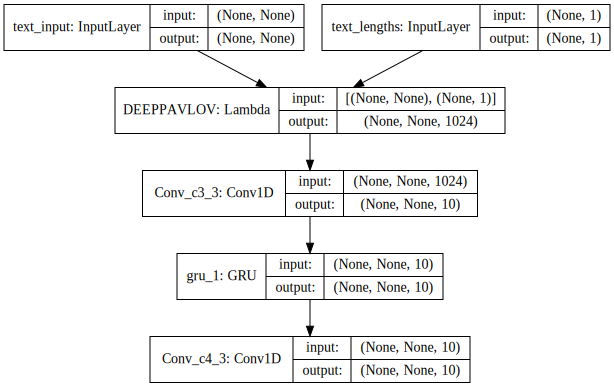

In [47]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 572 samples, validate on 191 samples
Epoch 1/3
572/572 [==============================] - 48s 83ms/step - loss: 0.0799 - acc: 0.0433 - val_loss: 0.0761 - val_acc: 0.0553
Epoch 2/3
572/572 [==============================] - 41s 72ms/step - loss: 0.0679 - acc: 0.0625 - val_loss: 0.0670 - val_acc: 0.0602
Epoch 3/3
572/572 [==============================] - 42s 73ms/step - loss: 0.0593 - acc: 0.0680 - val_loss: 0.0591 - val_acc: 0.0640


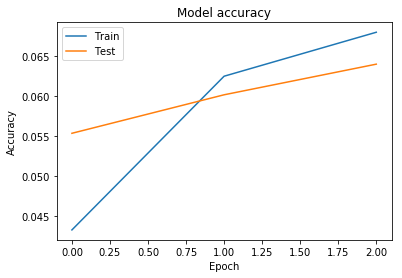

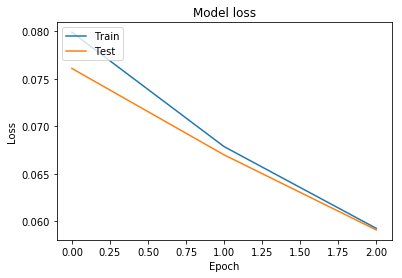

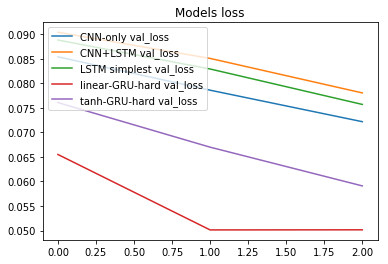

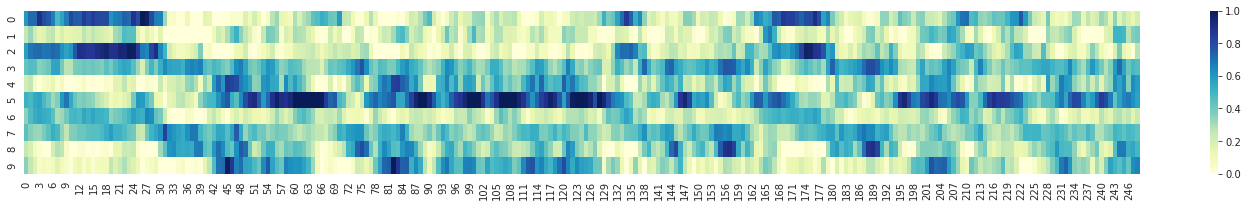

In [48]:
validate_model(graph, model, 'tanh-GRU-hard')

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 2-a: LSTM Simplest Model with Batch Normalization: 💀 НЕ СХОДИЦЦА

In [0]:
Хуй=None
def build_lstm_batch_norm(features):
  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[Хуй, ], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[Хуй, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs

  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())([text_input, text_lengths])
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')
  _out = LSTM(features, return_sequences=True)(_out)
  _out = BatchNormalization()(_out)
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  add(Activation('softmax')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=Хуй, decay=0.0, amsgrad=Хуй)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', 'categorical_accuracy'])
  model.summary()

  return model

In [31]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_batch_norm( np_LABELS.shape[-1] )


W0518 15:17:04.660052 139924012582784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 11)     33803       DEEPPAVLOV[0][0]                 
__________

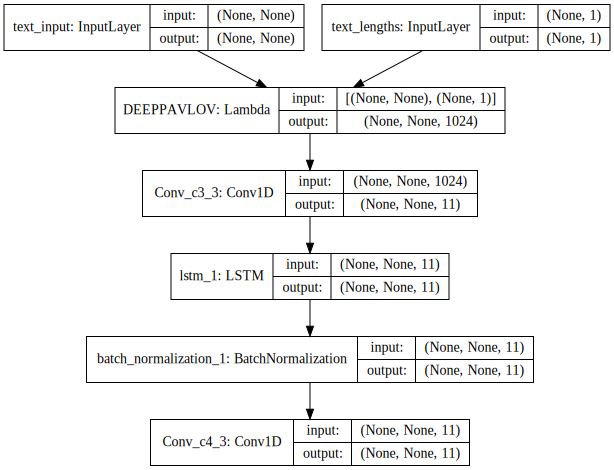

In [32]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0518 15:17:09.252006 139924012582784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


Train on 140 samples, validate on 47 samples
Epoch 1/2
140/140 [==============================] - 18s 131ms/step - loss: 1.7435 - acc: 0.4312 - categorical_accuracy: 0.4312 - val_loss: 0.6580 - val_acc: 0.7533 - val_categorical_accuracy: 0.7533
Epoch 2/2
140/140 [==============================] - 11s 76ms/step - loss: 0.4863 - acc: 0.8657 - categorical_accuracy: 0.8657 - val_loss: 0.4924 - val_acc: 0.9402 - val_categorical_accuracy: 0.9402


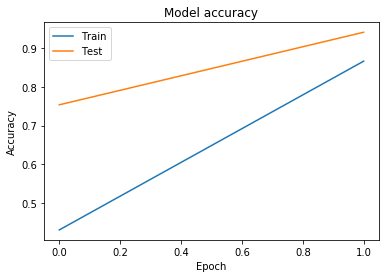

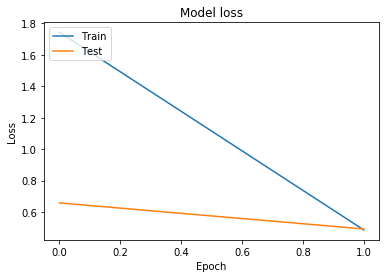

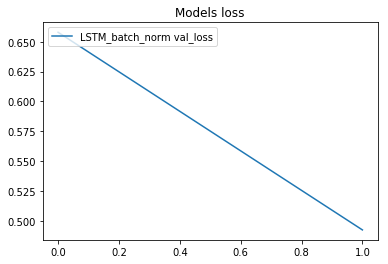

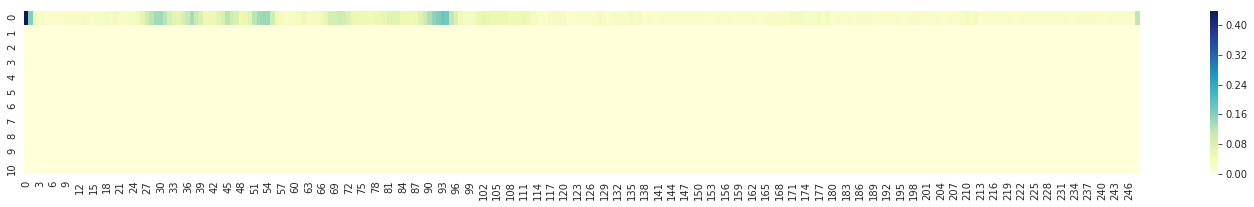

In [33]:
validate_model(graph, model, 'LSTM_batch_norm')

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
# #       color_matrix(pred[0], TEST_TOKENS)

## 2-a: LSTM Simplest   + Softmax

In [0]:
Хуй=None
from keras.layers import Activation
def build_lstm_batch_norm_softmax(features):
  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[Хуй, ], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[Хуй, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs

  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())([text_input, text_lengths])
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')
  _out = LSTM(features, return_sequences=True)(_out)
#   _out = BatchNormalization()(_out)
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='softmax')
   
  model = Model(inputs=[text_input, text_lengths], outputs=_out)


  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'categorical_accuracy'])
  model.summary()

  return model

In [29]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_batch_norm_softmax( np_LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 11)     33803       DEEPPAVLOV[0][0]                 
__________

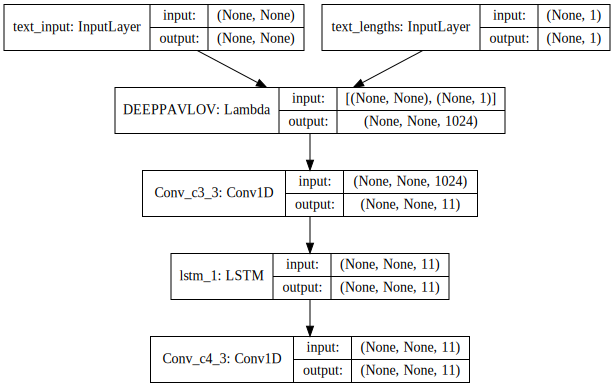

In [30]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

W0518 15:48:44.217368 140001491609472 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:102: div (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Train on 140 samples, validate on 47 samples
Epoch 1/20
140/140 [==============================] - 14s 99ms/step - loss: 2.0164 - acc: 0.2811 - categorical_accuracy: 0.2811 - val_loss: 1.7557 - val_acc: 0.7371 - val_categorical_accuracy: 0.7371
Epoch 2/20
140/140 [==============================] - 11s 79ms/step - loss: 1.6698 - acc: 0.7975 - categorical_accuracy: 0.7975 - val_loss: 1.5216 - val_acc: 0.9551 - val_categorical_accuracy: 0.9551
Epoch 3/20
140/140 [==============================] - 11s 79ms/step - loss: 1.4431 - acc: 0.9554 - categorical_accuracy: 0.9554 - val_loss: 1.2993 - val_acc: 0.9551 - val_categorical_accuracy: 0.9551
Epoch 4/20
140/140 [==============================] - 11s 79ms/step - loss: 1.2107 - acc: 0.9554 - categorical_accuracy: 0.9554 - val_loss: 1.0548 - val_acc: 0.9551 - val_categorical_accuracy: 0.9551
Epoch 5/20
140/140 [==============================] - 11s 79ms/step - loss: 0.9691 - acc: 0.9554 - categorical_accuracy: 0.9554 - val_loss: 0.8371 - val_ac

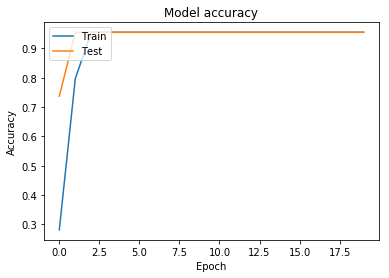

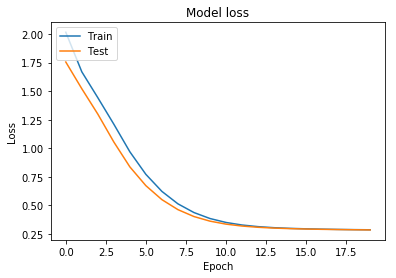

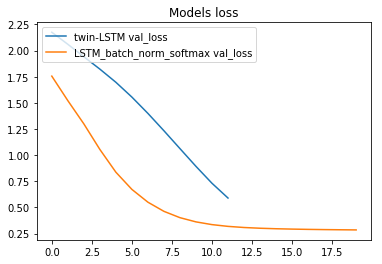

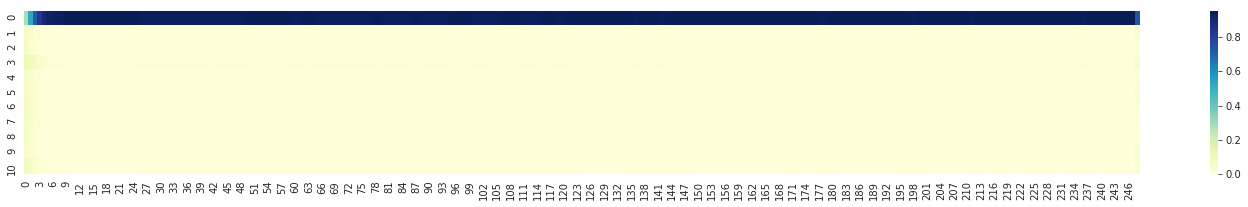

In [31]:
EPOCHS=20
validate_model(graph, model, 'LSTM_batch_norm_softmax')

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
# #       color_matrix(pred[0], TEST_TOKENS)

## 3а: 2 LSTM 💔( categorical_crossentropy, sigmoid) : 

In [0]:
def build_twin_lstm_model_a(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
   
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [22]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_twin_lstm_model_a( np_LABELS.shape[-1] )
  


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 11)     33803       DEEPPAVLOV[0][0]                 
__________

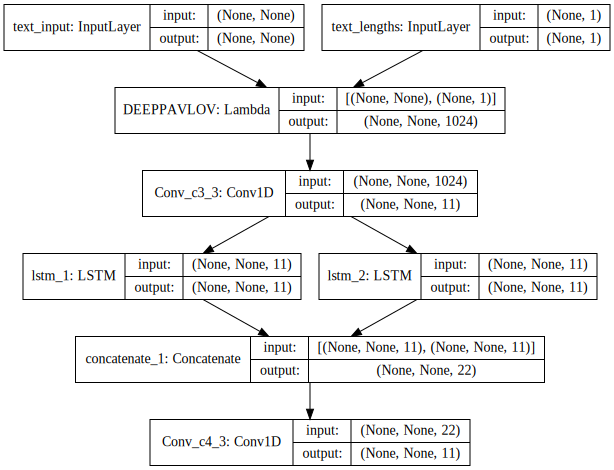

In [19]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 140 samples, validate on 47 samples
Epoch 1/12
140/140 [==============================] - 17s 120ms/step - loss: 2.3179 - acc: 0.2741 - val_loss: 2.1754 - val_acc: 0.7492
Epoch 2/12
140/140 [==============================] - 14s 97ms/step - loss: 2.1343 - acc: 0.7225 - val_loss: 2.0603 - val_acc: 0.9517
Epoch 3/12
140/140 [==============================] - 14s 97ms/step - loss: 2.0171 - acc: 0.9531 - val_loss: 1.9413 - val_acc: 0.9551
Epoch 4/12
140/140 [==============================] - 13s 96ms/step - loss: 1.8979 - acc: 0.9554 - val_loss: 1.8229 - val_acc: 0.9551
Epoch 5/12
140/140 [==============================] - 13s 96ms/step - loss: 1.7763 - acc: 0.9554 - val_loss: 1.6970 - val_acc: 0.9551
Epoch 6/12
140/140 [==============================] - 14s 97ms/step - loss: 1.6434 - acc: 0.9554 - val_loss: 1.5553 - val_acc: 0.9551
Epoch 7/12
140/140 [==============================] - 14s 101ms/step - loss: 1.4951 - acc: 0.9554 - val_loss: 1.3993 - val_acc: 0.9551
Epoch 8/12
140/

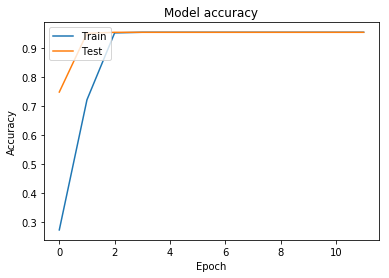

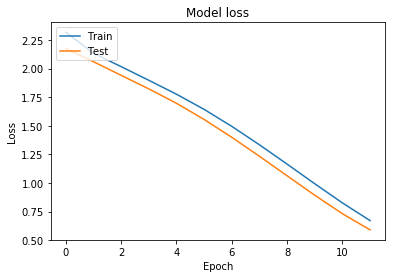

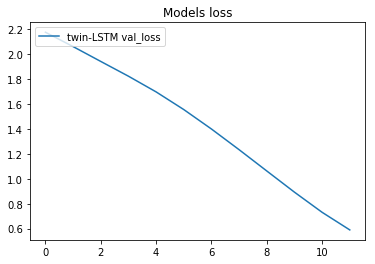

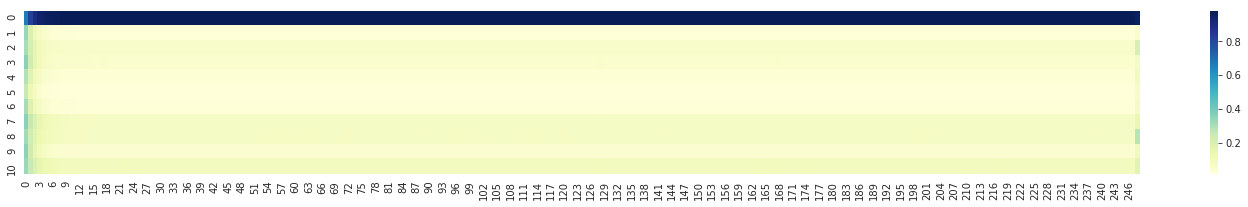

In [23]:
EPOCHS=12
validate_model(graph, model, 'twin-LSTM')


# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3b: 2 LSTM  ( Batch norm->out) : 💀 НЕ СХОДИЦЦА
### вообще все странно!

In [0]:
def build_twin_lstm_model_3b(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
  _out = BatchNormalization()(_out)
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss= 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [32]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_twin_lstm_model_3b( np_LABELS.shape[-1] )


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0518 14:19:11.937163 139801738364800 saver.py:1483] Saver not created because there are no variables in the graph to restore


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 10)     30730       DEEPPAVLOV[0][0]                 
__________

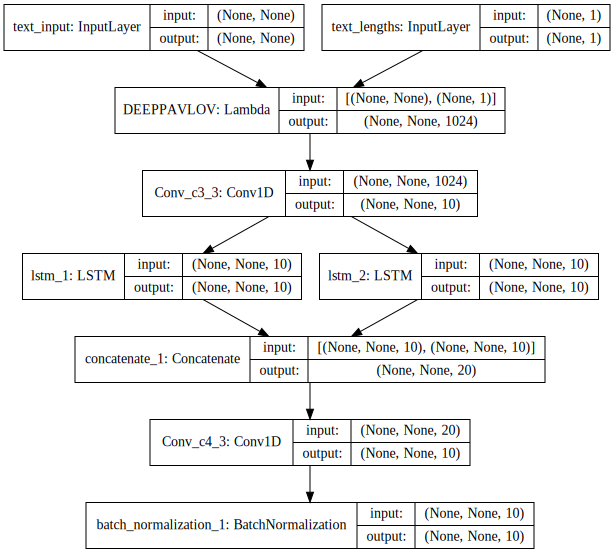

In [33]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
validate_model(graph, model, 'twin_lstm_model_batch_norm')

# with graph.as_default():  
 
#   with tf.Session() as sess:
   
#     K.set_session(sess) 
    
#     for i in range(1):
#       history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
#       plot_training_history(history)
#       pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
#       plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3b-1: 2 LSTM  ( Batch norm before CNN)  : СОВСЕМ БЕДА 💀 

In [0]:
def build_lstm_2_model_a(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'sigmoid_1', n=3, feature_maps=features, activation='sigmoid')  
  _out = BatchNormalization()(_out)
  _out = get_conv_pool(_out, 'sigmoid_2', n=3, feature_maps=features, activation='sigmoid')  
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

#   adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  model.summary()
  
  return model

In [0]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_2_model_a( np_LABELS.shape[-1] )


In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3c: 2 LSTM 💀 (one goes backwards, categorical_crossentropy, Batch norm)  : НЕ СХОДИЦЦА

In [0]:
def build_lstm_2_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = LSTM(features, return_sequences=True)(_out)   
  l2 = LSTM(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')  
  _out = BatchNormalization()(_out)
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy', 'categorical_accuracy'])
  model.summary()
  
  return model

In [0]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_lstm_2_model( np_LABELS.shape[-1] )


In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [0]:
with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)

## 3d: Twin GRU 💔 ( Nadam, sigmoid) : 

In [0]:
from keras.layers import GRU
def build_twin_GRU_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  _out = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid') 

  l1 = GRU(features, return_sequences=True)(_out)   
  l2 = GRU(features, return_sequences=True, go_backwards=True)(_out)   
  
  _out = Concatenate()([l1, l2]) 
  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='softmax')  
   
  

  model = Model(inputs=[text_input, text_lengths], outputs=_out)

 #   model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['accuracy'])
  model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])
  
  model.summary()
  
  return model

In [31]:
graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_twin_GRU_model( _LABELS.shape[-1] )


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
text_input (InputLayer)         (None, None)         0                                            
__________________________________________________________________________________________________
text_lengths (InputLayer)       (None, 1)            0                                            
__________________________________________________________________________________________________
DEEPPAVLOV (Lambda)             (None, None, 1024)   0           text_input[0][0]                 
                                                                 text_lengths[0][0]               
__________________________________________________________________________________________________
Conv_c3_3 (Conv1D)              (None, None, 11)     33803       DEEPPAVLOV[0][0]                 
__________

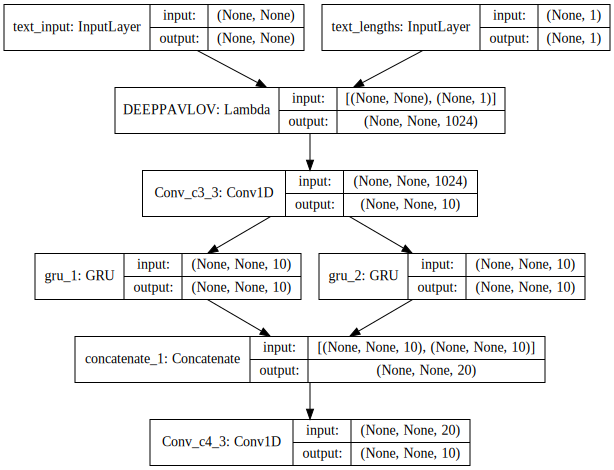

In [38]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

Train on 1004 samples, validate on 335 samples
Epoch 1/20
1004/1004 [==============================] - 90s 90ms/step - loss: 0.5564 - acc: 0.9171 - val_loss: 0.2336 - val_acc: 0.9590
Epoch 2/20
1004/1004 [==============================] - 87s 87ms/step - loss: 0.2224 - acc: 0.9583 - val_loss: 0.2019 - val_acc: 0.9590
Epoch 3/20
1004/1004 [==============================] - 89s 89ms/step - loss: 0.1819 - acc: 0.9583 - val_loss: 0.1571 - val_acc: 0.9590
Epoch 4/20
1004/1004 [==============================] - 89s 88ms/step - loss: 0.1461 - acc: 0.9583 - val_loss: 0.1345 - val_acc: 0.9590
Epoch 5/20
1004/1004 [==============================] - 89s 89ms/step - loss: 0.1264 - acc: 0.9584 - val_loss: 0.1184 - val_acc: 0.9604
Epoch 6/20
1004/1004 [==============================] - 89s 89ms/step - loss: 0.1103 - acc: 0.9617 - val_loss: 0.1059 - val_acc: 0.9654
Epoch 7/20
1004/1004 [==============================] - 90s 89ms/step - loss: 0.0979 - acc: 0.9685 - val_loss: 0.0970 - val_acc: 0.9696
E

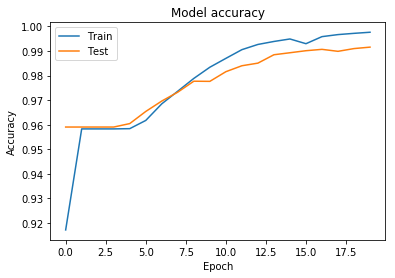

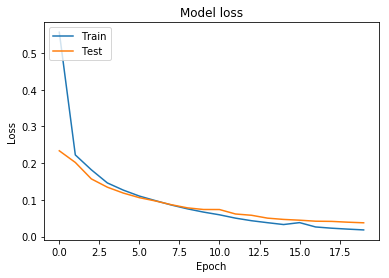

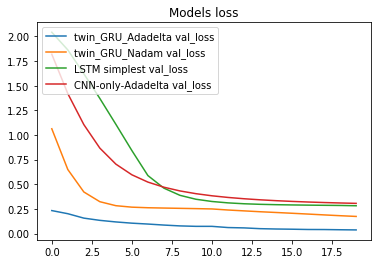

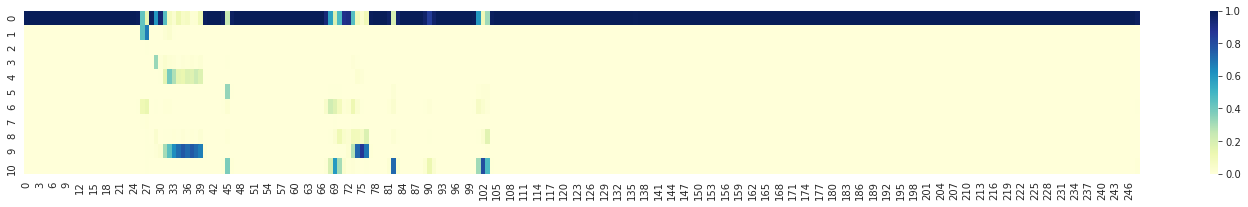

In [32]:
EPOCHS=20
validate_model(graph, model, 'twin_GRU_Adadelta')


Train on 140 samples, validate on 47 samples
Epoch 1/20
140/140 [==============================] - 15s 109ms/step - loss: 1.4930 - acc: 0.8094 - val_loss: 1.0631 - val_acc: 0.9553
Epoch 2/20
140/140 [==============================] - 12s 88ms/step - loss: 0.8941 - acc: 0.9576 - val_loss: 0.6499 - val_acc: 0.9553
Epoch 3/20
140/140 [==============================] - 12s 89ms/step - loss: 0.5515 - acc: 0.9576 - val_loss: 0.4223 - val_acc: 0.9553
Epoch 4/20
140/140 [==============================] - 13s 93ms/step - loss: 0.3765 - acc: 0.9576 - val_loss: 0.3236 - val_acc: 0.9553
Epoch 5/20
140/140 [==============================] - 13s 90ms/step - loss: 0.3023 - acc: 0.9576 - val_loss: 0.2832 - val_acc: 0.9553
Epoch 6/20
140/140 [==============================] - 13s 90ms/step - loss: 0.2721 - acc: 0.9576 - val_loss: 0.2682 - val_acc: 0.9553
Epoch 7/20
140/140 [==============================] - 13s 91ms/step - loss: 0.2609 - acc: 0.9576 - val_loss: 0.2624 - val_acc: 0.9553
Epoch 8/20
140/1

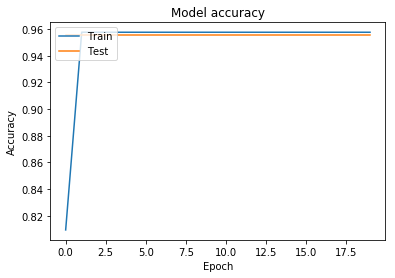

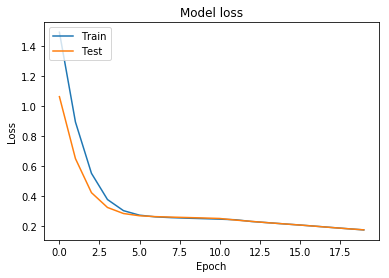

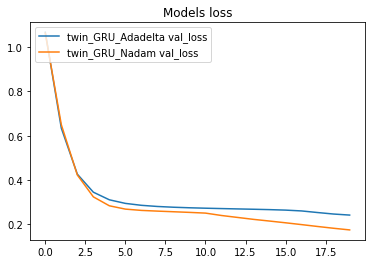

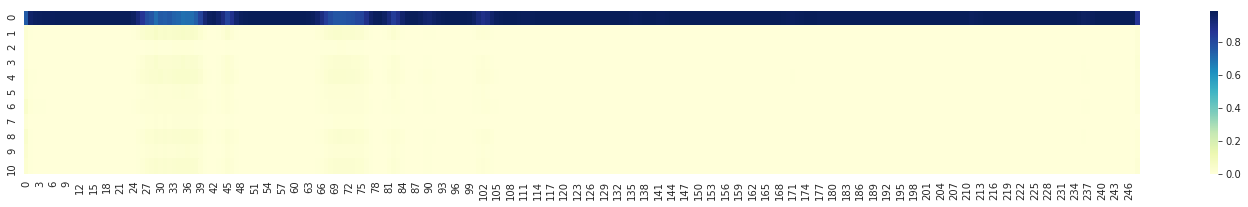

In [22]:
validate_model(graph, model, 'twin_GRU_Nadam')


## 4:  CNN + dropout Model : Хуй тебе, а не сходимость

In [0]:
def build_cnn_only_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  d = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
  d = Dropout(0.2)(d)

  conv_0 = get_conv_pool(d, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(d, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(d, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(d, 'c2', n=5, feature_maps=features*2, activation='sigmoid')

  
  _out = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 

  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')

  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
  model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

  model.summary()
  
  return model

In [0]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_cnn_only_model( np_LABELS.shape[-1] )
  
  


In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [0]:

with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
      plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)
      
      

      



## 0a:  CNN   + BatchNormalization

In [0]:
from keras.layers import SpatialDropout1D
from keras import metrics

def build_cnn_only_model(features): 

  # inputs:--------------------------------------------------------------------
  text_input = Input(shape=[None,], dtype='string', name="text_input")
  text_lengths = Input(batch_shape=[None, 1], dtype='int32', name='text_lengths')
  # ------------------------------------------------------------------- /inputs
   
  d = Lambda(get_embedings, elmo_output_shape, name="deeppavlov".upper())( [text_input, text_lengths]  )
#   d = SpatialDropout1D(0.1)(d)

  conv_0 = get_conv_pool(d, 'c0', n=4, feature_maps=2, activation='sigmoid' )  
  conv_00 = get_conv_pool(d, 'blurry', n=10, feature_maps=2, activation='sigmoid' )  
  conv_1 = get_conv_pool(d, 'c1', n=3, feature_maps=features*2, activation='sigmoid' )  
  conv_2 = get_conv_pool(d, 'c2', n=5, feature_maps=features*2, activation='sigmoid')

  
  _out = Concatenate()([conv_00, conv_0, conv_1, conv_2]) 

  _out = get_conv_pool(_out, 'c3', n=3, feature_maps=features, activation='sigmoid')
  
  _out = BatchNormalization()(_out)

  _out = get_conv_pool(_out, 'c4', n=3, feature_maps=features, activation='sigmoid')
  
  model = Model(inputs=[text_input, text_lengths], outputs=_out)

  adam = Adam(lr=0.05, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam)
  model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=[metrics.mae, metrics.categorical_accuracy])
#   model.compile(loss=custom_categorical_crossentropy, optimizer=adam, metrics=[metrics.mae, metrics.categorical_accuracy])

  model.summary()
  
  return model

In [0]:

graph = tf.Graph()
with graph.as_default():  
  elmo = hub.Module(module_url, trainable=False)
  model = build_cnn_only_model( np_LABELS.shape[-1] )
  
  


In [0]:
SVG(model_to_dot(model, show_layer_names=True, show_shapes=True).create(prog='dot', format='svg'))

In [0]:

with graph.as_default():  
 
  with tf.Session() as sess:
   
    K.set_session(sess) 
    
    for i in range(1):
      history = model.fit([_TEXTS[5:], _LENS[5:] ], np_LABELS[5:], validation_split=0.25, epochs=EPOCHS, batch_size=BATCH_SIZE)
      #plot_training_history(history)
      pred = model.predict([ [TEST_TOKENS, TEST_TOKENS], [len(TEST_TOKENS), len(TEST_TOKENS)] ])
      
      plot_matrix(pred[0])
#       color_matrix(pred[0], TEST_TOKENS)
      
      

      
 

In [0]:
color_matrix(pred[0], TEST_TOKENS)

In [0]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
